In [15]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Reading The Data

In [16]:
train = pd.read_csv('written_name_train_v2.csv')
valid = pd.read_csv('written_name_validation_v2.csv')

In [17]:
len(train)

330961

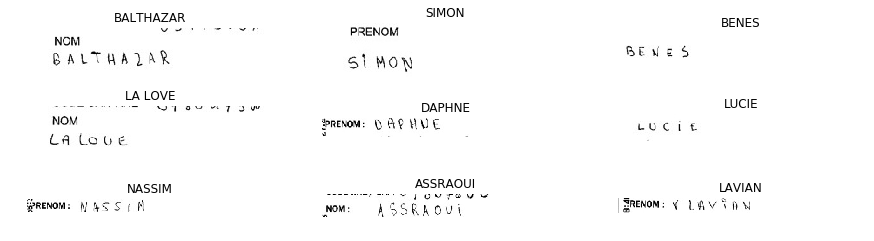

In [18]:
plt.figure(figsize=(15, 10))

for i in range(9):
    ax = plt.subplot(3,3,i+1)
    img_dir = 'train_v2/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [19]:
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


# Preprocessing The Data

In [20]:
train.dropna(inplace=True)
train.drop(train[train['IDENTITY']=='UNREADABLE'].index, inplace=True)

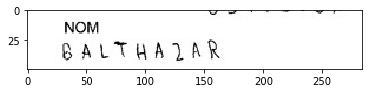

In [21]:
image = cv2.imread('train_v2/train/{}'.format(train.loc[0,'FILENAME']))
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (30,150))
image = image/255
image = np.reshape(image, (-1,30,150,1))

In [22]:
def read_and_preprocess(df_x,path):
    temp_list = []
    count = 0
    for i in tqdm(range(len(df_x))):
        try:
            img = cv2.imread(path.format(df_x.loc[i,'FILENAME']))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (30,140))
            img = img/255
            img = np.reshape(img, (-1,30,140,1))
            temp_list.append(img)
        except:
            count+=1
            temp_list.append('Nan')
    print('Error Count: {}'.format(count))
    return temp_list

def labels(df_x):
    
    alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
    total_list = []
    count = 0
    
    for i in tqdm(range(len(df_x))):
        try:
            temp_list = []
            for y in df_x.loc[i,'IDENTITY']:
                temp_list.append(alphabets.find(y))
            temp_list = np.array(temp_list)
            total_list.append(temp_list)
        except:
            count+=1
            total_list.append('Nan')
            
    print('Error Count: {}'.format(count))
    return total_list

In [23]:
train['ARRAY'] = read_and_preprocess(train, 'train_v2/train/{}')
train['IDENTITY_LABEL'] = labels(train)
train.drop(train[train['ARRAY']=='Nan'].index, inplace=True)

100%|███████████████████████████████████████████████████████████████████████| 330294/330294 [00:14<00:00, 23228.12it/s]

Error Count: 667


In [24]:
train.head()

,FILENAME,IDENTITY,IDENTITY_LABEL
0,TRAIN_00001.jpg,BALTHAZAR,"[1, 0, 11, 19, 7, 0, 25, 0, 17]"
1,TRAIN_00002.jpg,SIMON,"[18, 8, 12, 14, 13]"
2,TRAIN_00003.jpg,BENES,"[1, 4, 13, 4, 18]"
3,TRAIN_00004.jpg,LA LOVE,"[11, 0, 28, 11, 14, 21, 4]"
4,TRAIN_00005.jpg,DAPHNE,"[3, 0, 15, 7, 13, 4]"


In [26]:
train['IDENTITY_LABEL'].shape

(330294,)

In [28]:
train['IDENTITY'].value_counts()

THOMAS        1825
EMPTY         1796
LEA           1582
EMMA          1482
LUCAS         1479
              ... 
VEZIEN           1
IONQUIERES       1
KIABILUA         1
KARCHOUN         1
SABIAN           1
Name: IDENTITY, Length: 100538, dtype: int64

In [12]:
train.loc[0,'IDENTITY_LABEL']

array([ 1,  0, 11, 19,  7,  0, 25,  0, 17])

# Splitting The Data

In [27]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train['ARRAY'].values
y = train['IDENTITY_LABEL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)